In [1]:
from osgeo import gdal,ogr,osr
import pandas as pd
import geopandas
from shapely import wkt
from itertools import compress
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def ImageBoundry(FilePath):
        #for aspect data
        imgname=FilePath

        from osgeo import gdal,ogr
        ds = gdal.Open(FilePath)
        gt = ds.GetGeoTransform()  # captures origin and pixel size
        srs = osr.SpatialReference()
        srs.ImportFromEPSG(4326)
        

        
        ULC = gdal.ApplyGeoTransform(gt, 0, 0) #Upper Left Corner
        URC = gdal.ApplyGeoTransform(gt, ds.RasterXSize, 0) #Upper Right Corner
        LLC = gdal.ApplyGeoTransform(gt, 0, ds.RasterYSize) #Lower Left Corner
        LRC = gdal.ApplyGeoTransform(gt, ds.RasterXSize, ds.RasterYSize) #Lower Right Corner
                   
        ring = ogr.Geometry(ogr.wkbLinearRing)
        ring.AddPoint_2D(ULC[0], ULC[1])
        ring.AddPoint_2D(URC[0], URC[1])
        ring.AddPoint_2D(LRC[0], LRC[1])
        ring.AddPoint_2D(LLC[0], LLC[1])
        ring.AddPoint_2D(ULC[0], ULC[1]) 
        poly=ogr.Geometry(ogr.wkbPolygon)
        poly.AddGeometry(ring)
        #poly.SpatialReference('EPSG:4326')
        # second item is name of the image
        return poly.ExportToJson() ,imgname

In [3]:
def ListofExtensionAndName(directory,extension):
     
        if len(directory) != None:
            import os
            FilesList = []
            FileName=[]
            for root, subdirectory, files in os.walk(directory):
                for file in files:
                    if file.endswith(extension):
                        FilesList.append(os.path.join(root,file))
                        base=os.path.basename(file)
                        FileName.append(os.path.splitext(base)[0])

            return sorted(FilesList),sorted(FileName)
        else:
            print("no"+ extension +"file for this directory")

In [4]:
tmp_data=ListofExtensionAndName('../geoserver_data/global-climate-mountly/north/','tif')

In [6]:
tmp_data[0]

['../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_01.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_02.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_03.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_04.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_05.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_06.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_07.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_08.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_09.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_10.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_11.tif',
 '../geoserver_data/global-climate-mountly/north/wc2.1_30s_tavg_12.tif']

**********************************

wc2.1_30s_tavg_01 Temperature Info
wc2.1_30s_tavg_01 MAX temp is 31.4
-----------
wc2.1_30s_tavg_01 MIN temp is 25.0
-----------
wc2.1_30s_tavg_01 MEAN temp is 28.200003
-----------


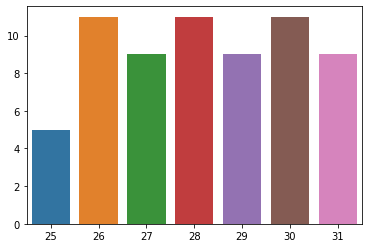

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_02 Temperature Info
wc2.1_30s_tavg_02 MAX temp is 32.3
-----------
wc2.1_30s_tavg_02 MIN temp is 25.0
-----------
wc2.1_30s_tavg_02 MEAN temp is 28.650002
-----------


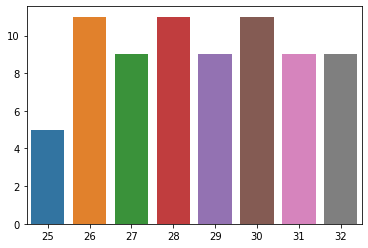

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_03 Temperature Info
wc2.1_30s_tavg_03 MAX temp is 33.1
-----------
wc2.1_30s_tavg_03 MIN temp is 25.0
-----------
wc2.1_30s_tavg_03 MEAN temp is 29.050001
-----------


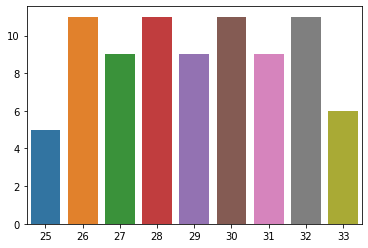

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_04 Temperature Info
wc2.1_30s_tavg_04 MAX temp is 34.4
-----------
wc2.1_30s_tavg_04 MIN temp is 25.0
-----------
wc2.1_30s_tavg_04 MEAN temp is 29.7
-----------


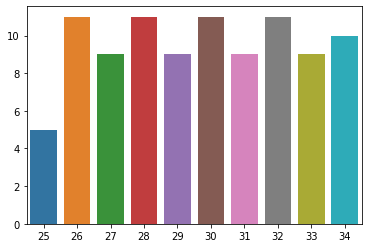

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_05 Temperature Info
wc2.1_30s_tavg_05 MAX temp is 36.4
-----------
wc2.1_30s_tavg_05 MIN temp is 25.0
-----------
wc2.1_30s_tavg_05 MEAN temp is 30.7
-----------


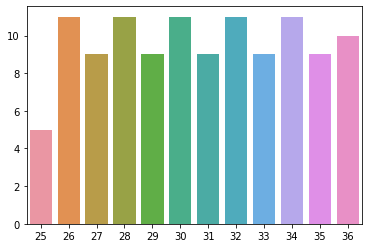

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_06 Temperature Info
wc2.1_30s_tavg_06 MAX temp is 38.6
-----------
wc2.1_30s_tavg_06 MIN temp is 25.0
-----------
wc2.1_30s_tavg_06 MEAN temp is 31.800001
-----------


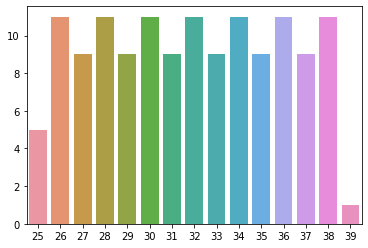

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_07 Temperature Info
wc2.1_30s_tavg_07 MAX temp is 39.9
-----------
wc2.1_30s_tavg_07 MIN temp is 25.0
-----------
wc2.1_30s_tavg_07 MEAN temp is 32.449997
-----------


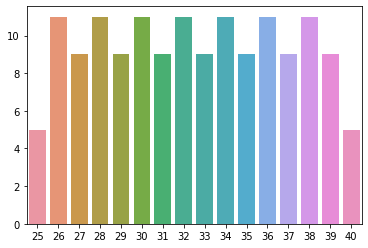

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_08 Temperature Info
wc2.1_30s_tavg_08 MAX temp is 38.7
-----------
wc2.1_30s_tavg_08 MIN temp is 25.0
-----------
wc2.1_30s_tavg_08 MEAN temp is 31.849998
-----------


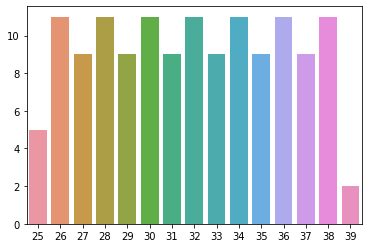

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_09 Temperature Info
wc2.1_30s_tavg_09 MAX temp is 36.1
-----------
wc2.1_30s_tavg_09 MIN temp is 25.0
-----------
wc2.1_30s_tavg_09 MEAN temp is 30.550001
-----------


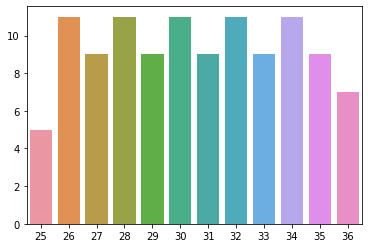

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_10 Temperature Info
wc2.1_30s_tavg_10 MAX temp is 33.0
-----------
wc2.1_30s_tavg_10 MIN temp is 25.0
-----------
wc2.1_30s_tavg_10 MEAN temp is 29.0
-----------


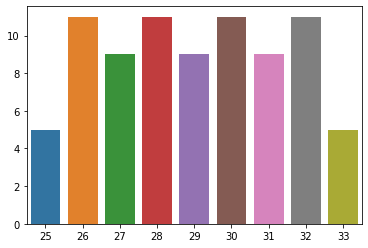

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_11 Temperature Info
wc2.1_30s_tavg_11 MAX temp is 30.7
-----------
wc2.1_30s_tavg_11 MIN temp is 25.0
-----------
wc2.1_30s_tavg_11 MEAN temp is 27.849998
-----------


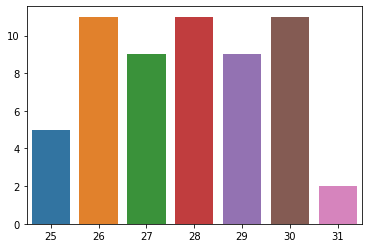

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_12 Temperature Info
wc2.1_30s_tavg_12 MAX temp is 30.4
-----------
wc2.1_30s_tavg_12 MIN temp is 25.0
-----------
wc2.1_30s_tavg_12 MEAN temp is 27.7
-----------


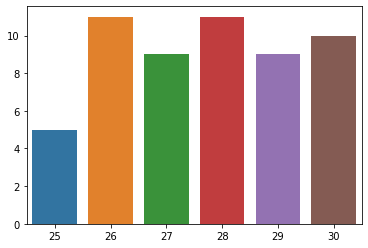

<Figure size 1440x1080 with 0 Axes>

In [7]:
for index,i in enumerate(tmp_data[0]):
    img=gdal.Open(i)
    array=img.ReadAsArray()
    
    unique, counts =np.unique(array, return_counts=True)
    # ELIMINATE DATA UNDER 25
    unique=np.where((unique<25),np.NaN,unique)
    print('**********************************')
    print('')
    print(tmp_data[1][index]+' Temperature Info')
    tmp_max=np.nanmax(unique)
    tmp_min=np.nanmin(unique)
    tmp_mean=np.nanmean(unique)
    print(tmp_data[1][index]+' MAX temp is '+str(tmp_max))
    print('-----------')
    print(tmp_data[1][index]+' MIN temp is '+str(tmp_min))
    print('-----------')
    print(tmp_data[1][index]+' MEAN temp is '+str(tmp_mean))    
    print('-----------')
    
    array_hot_int=np.rint(unique)
    array_hot_int=array_hot_int.astype('int8')
    unique_hot, counts =np.unique(array_hot_int, return_counts=True)
    value=dict(zip(list(unique_hot), counts))
    del value[0]
    sns.barplot(x=list(value.keys()),y=list(value.values()),ci="sd")
    plt.figure(figsize=(20,15))
    plt.show()

    img=None
    array=None

### South

In [8]:
tmp_datoa_south=ListofExtensionAndName('../geoserver_data/global-climate-mountly/south/','tif')

**********************************

wc2.1_30s_tavg_01 Temperature Info
wc2.1_30s_tavg_01 MAX temp is 34.1
-----------
wc2.1_30s_tavg_01 MIN temp is 25.0
-----------
wc2.1_30s_tavg_01 MEAN temp is 29.550001
-----------


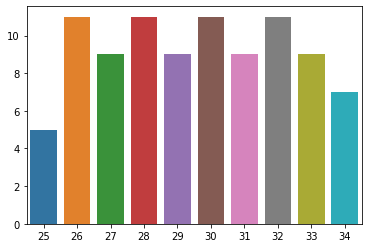

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_02 Temperature Info
wc2.1_30s_tavg_02 MAX temp is 33.0
-----------
wc2.1_30s_tavg_02 MIN temp is 25.0
-----------
wc2.1_30s_tavg_02 MEAN temp is 29.0
-----------


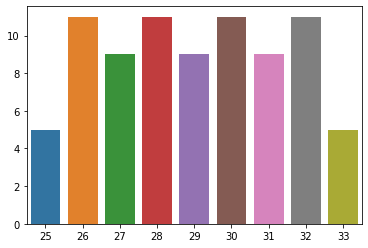

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_03 Temperature Info
wc2.1_30s_tavg_03 MAX temp is 32.1
-----------
wc2.1_30s_tavg_03 MIN temp is 25.0
-----------
wc2.1_30s_tavg_03 MEAN temp is 28.550001
-----------


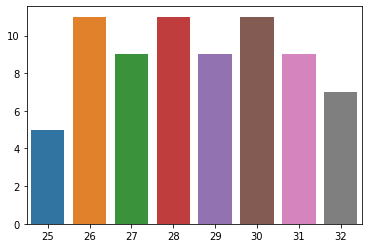

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_04 Temperature Info
wc2.1_30s_tavg_04 MAX temp is 30.4
-----------
wc2.1_30s_tavg_04 MIN temp is 25.0
-----------
wc2.1_30s_tavg_04 MEAN temp is 27.655556
-----------


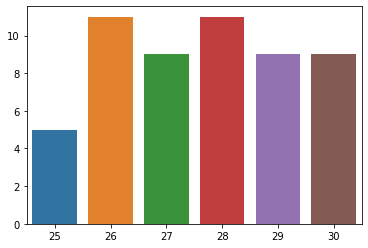

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_05 Temperature Info
wc2.1_30s_tavg_05 MAX temp is 30.0
-----------
wc2.1_30s_tavg_05 MIN temp is 25.0
-----------
wc2.1_30s_tavg_05 MEAN temp is 27.358332
-----------


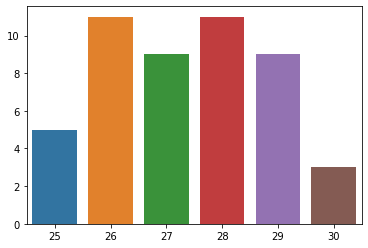

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_06 Temperature Info
wc2.1_30s_tavg_06 MAX temp is 29.9
-----------
wc2.1_30s_tavg_06 MIN temp is 25.0
-----------
wc2.1_30s_tavg_06 MEAN temp is 27.312765
-----------


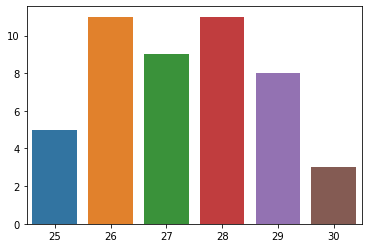

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_07 Temperature Info
wc2.1_30s_tavg_07 MAX temp is 29.4
-----------
wc2.1_30s_tavg_07 MIN temp is 25.0
-----------
wc2.1_30s_tavg_07 MEAN temp is 27.109304
-----------


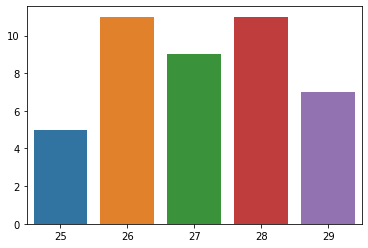

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_08 Temperature Info
wc2.1_30s_tavg_08 MAX temp is 29.5
-----------
wc2.1_30s_tavg_08 MIN temp is 25.0
-----------
wc2.1_30s_tavg_08 MEAN temp is 27.250002
-----------


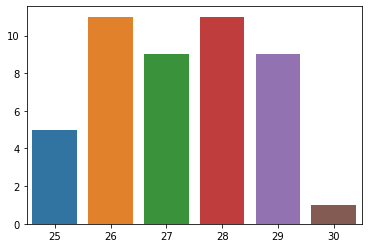

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_09 Temperature Info
wc2.1_30s_tavg_09 MAX temp is 29.8
-----------
wc2.1_30s_tavg_09 MIN temp is 25.0
-----------
wc2.1_30s_tavg_09 MEAN temp is 27.400002
-----------


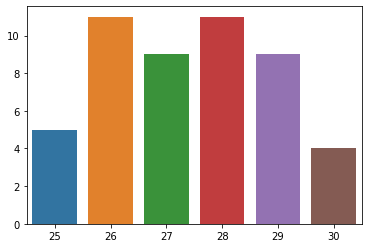

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_10 Temperature Info
wc2.1_30s_tavg_10 MAX temp is 32.3
-----------
wc2.1_30s_tavg_10 MIN temp is 25.0
-----------
wc2.1_30s_tavg_10 MEAN temp is 28.650002
-----------


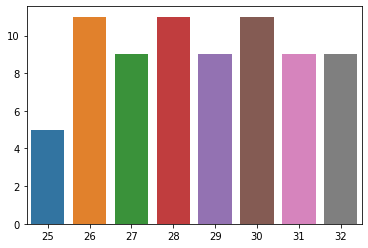

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_11 Temperature Info
wc2.1_30s_tavg_11 MAX temp is 33.3
-----------
wc2.1_30s_tavg_11 MIN temp is 25.0
-----------
wc2.1_30s_tavg_11 MEAN temp is 29.150002
-----------


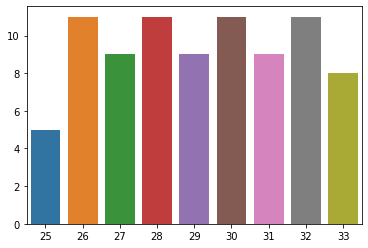

<Figure size 1440x1080 with 0 Axes>

**********************************

wc2.1_30s_tavg_12 Temperature Info
wc2.1_30s_tavg_12 MAX temp is 33.1
-----------
wc2.1_30s_tavg_12 MIN temp is 25.0
-----------
wc2.1_30s_tavg_12 MEAN temp is 29.050001
-----------


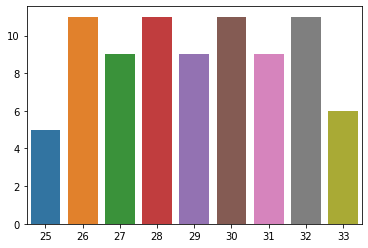

<Figure size 1440x1080 with 0 Axes>

In [9]:
for index,i in enumerate(tmp_datoa_south[0]):
    img=gdal.Open(i)
    array=img.ReadAsArray()
    
    unique, counts =np.unique(array, return_counts=True)
    # ELIMINATE DATA UNDER 25
    unique=np.where((unique<25),np.NaN,unique)
    print('**********************************')
    print('')
    print(tmp_datoa_south[1][index]+' Temperature Info')
    tmp_max=np.nanmax(unique)
    tmp_min=np.nanmin(unique)
    tmp_mean=np.nanmean(unique)
    print(tmp_data[1][index]+' MAX temp is '+str(tmp_max))
    print('-----------')
    print(tmp_data[1][index]+' MIN temp is '+str(tmp_min))
    print('-----------')
    print(tmp_data[1][index]+' MEAN temp is '+str(tmp_mean))    
    print('-----------')
    
    array_hot_int=np.rint(unique)
    array_hot_int=array_hot_int.astype('int8')
    unique_hot, counts =np.unique(array_hot_int, return_counts=True)
    value=dict(zip(list(unique_hot), counts))
    del value[0]
    sns.barplot(x=list(value.keys()),y=list(value.values()),ci="sd")
    plt.figure(figsize=(20,15))
    plt.show()

    img=None
    array=None